In [21]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\En_In.xls'

# Read the Excel file, skipping the first two columns and extra header/footer rows
data = pd.read_excel(file_path, skiprows=2, usecols="C:F", skipfooter=1)

# Rename the columns
data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Drop rows with missing or non-numeric values in critical columns
data = data.dropna(subset=['Country'])
data = data[data['Energy Supply per Capita'].apply(lambda x: str(x).isnumeric())]

# Convert numerical columns to appropriate types
data['Energy Supply per Capita'] = pd.to_numeric(data['Energy Supply per Capita'], errors='coerce')
data['% Renewable'] = pd.to_numeric(data['% Renewable'], errors='coerce')

# Replace missing data ("...") with NaN
data['Energy Supply'] = pd.to_numeric(data['Energy Supply'], errors='coerce')

# Convert Energy Supply from petajoules to gigajoules
data['Energy Supply'] = data['Energy Supply'] * 1_000_000

# Display the cleaned data
print(data)


                       Country  Energy Supply  Energy Supply per Capita  \
8                  Afghanistan   3.210000e+08                        10   
15                 Afghanistan   3.210000e+08                        10   
16                     Albania   1.020000e+08                        35   
17                     Algeria   1.959000e+09                        51   
19                     Andorra            NaN                       121   
..                         ...            ...                       ...   
237                   Viet Nam   2.554000e+09                        28   
238  Wallis and Futuna Islands   0.000000e+00                        26   
239                      Yemen   3.440000e+08                        13   
240                     Zambia   4.000000e+08                        26   
241                   Zimbabwe   4.800000e+08                        32   

     % Renewable  
8       78.66928  
15      78.66928  
16     100.00000  
17       0.55101  
19  

In [29]:
import pandas as pd
import numpy as np
import re

# Load the Excel file and preprocess
file_path = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\En_In.xls'
data = pd.read_excel(file_path, skiprows=2, usecols="C:F", skipfooter=1)
data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Replace missing data ("...") with NaN
data = data.dropna(subset=['Country'])
data = data[data['Energy Supply per Capita'].apply(lambda x: str(x).isnumeric())]
data['Energy Supply'] = pd.to_numeric(data['Energy Supply'], errors='coerce')
# Convert Energy Supply from petajoules to gigajoules
data['Energy Supply'] = data['Energy Supply'] * 1_000_000

# Clean up country names by removing text in parentheses and numbers
def clean_country_name(name):
    if isinstance(name, str):  # Check if the value is a string
        # Remove text within parentheses
        name = re.sub(r'\(.*?\)', '', name)
        # Remove digits
        name = re.sub(r'\d+', '', name)
        # Strip any extra whitespace
        return name.strip()
    return name  # If not a string, return as-is

data['Country'] = data['Country'].apply(clean_country_name)

# Display the cleaned DataFrame
print(data)


                       Country  Energy Supply Energy Supply per Capita  \
8                  Afghanistan   3.210000e+08                       10   
15                 Afghanistan   3.210000e+08                       10   
16                     Albania   1.020000e+08                       35   
17                     Algeria   1.979000e+09                       51   
19                     Andorra            NaN                      121   
..                         ...            ...                      ...   
237                   Viet Nam   2.554000e+09                       28   
238  Wallis and Futuna Islands   0.000000e+00                       26   
239                      Yemen   3.440000e+08                       13   
240                     Zambia   4.000000e+08                       26   
241                   Zimbabwe   4.800000e+08                       32   

    % Renewable  
8      78.66928  
15     78.66928  
16          100  
17      0.55101  
19     88.69565  
.. 

In [32]:
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\En_In.xls'

# Read the Excel file, skipping the first two columns and extra header/footer rows
data = pd.read_excel(file_path, skiprows=2, usecols="C:F", skipfooter=1)

# Rename the columns
data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Drop rows with missing or non-numeric values in critical columns
data = data.dropna(subset=['Country'])
data = data[data['Energy Supply per Capita'].apply(lambda x: str(x).isnumeric())]

# Convert numerical columns to appropriate types
data['Energy Supply per Capita'] = pd.to_numeric(data['Energy Supply per Capita'], errors='coerce')
data['% Renewable'] = pd.to_numeric(data['% Renewable'], errors='coerce')

# Replace missing data ("...") with NaN
data['Energy Supply'] = pd.to_numeric(data['Energy Supply'], errors='coerce')

def clean_country_name(name):
    if isinstance(name, str):  # Check if the value is a string
        # Remove text within parentheses
        name = re.sub(r'\(.*?\)', '', name)
        # Remove digits
        name = re.sub(r'\d+', '', name)
        # Strip any extra whitespace
        return name.strip()
    return name  # If not a string, return as-is

data['Country'] = data['Country'].apply(clean_country_name)

# Dictionary for renaming countries
country_rename_map = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

# Apply renaming using the map
data['Country'] = data['Country'].replace(country_rename_map)
pd.set_option('display.max_rows', None)
# Display the updated DataFrame
print(data)
d.reset_option('display.max_rows')

                                        Country  Energy Supply  \
8                                   Afghanistan          321.0   
15                                  Afghanistan          321.0   
16                                      Albania          102.0   
17                                      Algeria         1979.0   
19                                      Andorra            NaN   
20                                       Angola          642.0   
21                                     Anguilla            2.0   
22                          Antigua and Barbuda            8.0   
23                                    Argentina         3378.0   
24                                      Armenia          143.0   
25                                        Aruba           12.0   
26                                    Australia         5386.0   
27                                      Austria         1391.0   
28                                   Azerbaijan          567.0   
29        

NameError: name 'd' is not defined

In [33]:
import pandas as pd

# Load the GDP data from the CSV file
file_path_gdp = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\gpd.csv'  # Replace with the actual file path
gdp_data = pd.read_csv(file_path_gdp, skiprows=4)  # Skip the first 4 rows to get the correct headers

# Rename the specified countries
country_rename_map_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

# Replace old country names with new names
gdp_data['Country Name'] = gdp_data['Country Name'].replace(country_rename_map_gdp)

# Display the updated DataFrame
print(gdp_data)


                                          Country Name Country Code  \
0                                                Aruba          ABW   
1                                              Andorra          AND   
2                                          Afghanistan          AFG   
3                                               Angola          AGO   
4                                              Albania          ALB   
5                                           Arab World          ARB   
6                                 United Arab Emirates          ARE   
7                                            Argentina          ARG   
8                                              Armenia          ARM   
9                                       American Samoa          ASM   
10                                 Antigua and Barbuda          ATG   
11                                           Australia          AUS   
12                                             Austria          AUT   
13    

In [38]:
import pandas as pd

# Load the Sciamgo Journal and Country Rank data
file_path_scimagojr = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\scimagojr.xlsx'  # Replace with your file path
scimagojr_data = pd.read_excel(file_path_scimagojr)

# Display the first few rows of the dataset
print(scimagojr_data)


     Rank                         Country  Documents  Citable documents  \
0       1                           China     127050             126767   
1       2                   United States      96661              94747   
2       3                           Japan      30504              30287   
3       4                  United Kingdom      20944              20357   
4       5              Russian Federation      18534              18301   
5       6                          Canada      17899              17620   
6       7                         Germany      17027              16831   
7       8                           India      15005              14841   
8       9                          France      13153              12973   
9      10                     South Korea      11983              11923   
10     11                           Italy      10964              10794   
11     12                           Spain       9428               9330   
12     13                

In [37]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


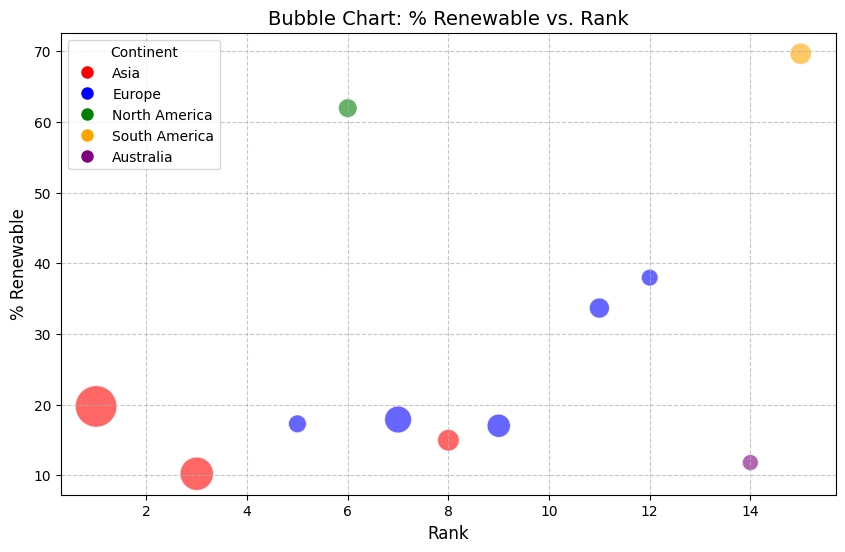

In [57]:
# Re-importing necessary modules for execution
import pandas as pd
import matplotlib.pyplot as plt
# Reload the Energy Data
file_path_energy = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\En_In.xls'
energy_data = pd.read_excel(file_path_energy, skiprows=6, usecols="C:F")
energy_data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy_data['Energy Supply'] = pd.to_numeric(energy_data['Energy Supply'], errors='coerce') * 1_000_000
energy_data['Energy Supply per Capita'] = pd.to_numeric(energy_data['Energy Supply per Capita'], errors='coerce')
energy_data['% Renewable'] = pd.to_numeric(energy_data['% Renewable'], errors='coerce')

# Clean up country names
import re
def clean_country_name(name):
    if isinstance(name, str):
        name = re.sub(r'\(.*?\)', '', name)
        name = re.sub(r'\d+', '', name)
        return name.strip()
    return name
energy_data['Country'] = energy_data['Country'].apply(clean_country_name)

# Reload the GDP Data
file_path_gdp = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\gpd.csv'
gdp_data = pd.read_csv(file_path_gdp, skiprows=4)
country_rename_map_gdp = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp_data['Country Name'] = gdp_data['Country Name'].replace(country_rename_map_gdp)
gdp_last_10_years = gdp_data[['Country Name', '2006', '2007', '2008', '2009', '2010', 
                              '2011', '2012', '2013', '2014', '2015']]

# Reload the Sciamgo Journal Data
file_path_scimagojr = r'C:\Users\Lenovo\Desktop\Unic_Kharkiv\Python\Lab4\scimagojr.xlsx'
scimagojr_data = pd.read_excel(file_path_scimagojr)

# Select the top 15 countries by Rank from Sciamgo data
scimagojr_top15 = scimagojr_data[scimagojr_data['Rank'] <= 15]

# Merge the datasets
merged_data = pd.merge(scimagojr_top15, energy_data, how='inner', left_on='Country', right_on='Country')
final_merged_data = pd.merge(merged_data, gdp_last_10_years, how='inner', 
                             left_on='Country', right_on='Country Name')

# Drop the extra 'Country Name' column
final_merged_data = final_merged_data.drop(columns=['Country Name'])

# Set the index to the name of the country
final_merged_data = final_merged_data.set_index('Country')

# Reorder the columns as specified
final_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                 '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
final_merged_data = final_merged_data[final_columns]

def create_bubble_chart_with_continents(merged_data):
    """
    Create a bubble chart showing % Renewable vs. Rank.
    The size of the bubble corresponds to the countries' 2015 GDP, 
    and the color corresponds to the continent.
    
    Parameters:
        merged_data (DataFrame): Merged dataset containing relevant columns.
    """
    # Define a dictionary mapping countries to continents
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }
    
    # Map continent to each country
    merged_data['Continent'] = merged_data.index.map(ContinentDict)

    # Define continent colors
    continent_colors = {
        'Asia': 'red',
        'Europe': 'blue',
        'North America': 'green',
        'South America': 'orange',
        'Australia': 'purple'
    }

    # Map continent colors to countries
    merged_data['Color'] = merged_data['Continent'].map(continent_colors)
    
    # Plot the bubble chart
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        merged_data['Rank'], 
        merged_data['% Renewable'], 
        s=merged_data['2015'] / 1e10,  # Scale GDP for bubble size
        c=merged_data['Color'], 
        alpha=0.6, 
        edgecolors='w', 
        linewidth=0.5
    )
    
    # Set chart title and labels=
    plt.title('Bubble Chart: % Renewable vs. Rank', fontsize=14)
    plt.xlabel('Rank', fontsize=12)
    plt.ylabel('% Renewable', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add a legend for continents
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=continent, 
                                  markersize=10, markerfacecolor=color) 
                       for continent, color in continent_colors.items()]
    plt.legend(handles=legend_elements, title="Continent", loc="upper left")

    # Show the chart
    plt.show()

# Example usage:
create_bubble_chart_with_continents(final_merged_data)

